In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
#xtotal的x坐标必须按顺序排的才适用
def get3DVGPoint(xtotal):
    #以数组存储可见的点
    arr=[]
    
    for i in range(0,len(xtotal)-1):
        for j in range(i+1,len(xtotal)):
            #如果相邻则可见，就直接加入数组中
            if j-i==1:
                arr.append([xtotal[i],xtotal[j]])
            else:
                #t为1则说明没通过检验，则不可见
                t=0
                #遍历i，j之间的点k
                for k in range(i+1,j):
                    #1.检查每两个点之间的点是否满足方程(2)
                    #判断之间的点是否有斜率相等的
                    #若斜率相等则进一步
                    if (xtotal[k][1]-xtotal[i][1])/(xtotal[k][0]-xtotal[i][0])==(xtotal[j][1]-xtotal[i][1])/(xtotal[j][0]-xtotal[i][0]):
                        #2.通过公式（3）判断
                        if xtotal[k][2]>=xtotal[j][2]+(xtotal[j][0]-xtotal[k][0])*(xtotal[i][2]-xtotal[j][2])/(xtotal[j][0]-xtotal[i][0]):
                            t=1
                #若t不为1则说明通过检验则，加入数组
                if not t==1:
                    arr.append([xtotal[i],xtotal[j]])
                    
    #返回
    return arr

get3DVGPoint(xtotal)

NameError: name 'xtotal' is not defined

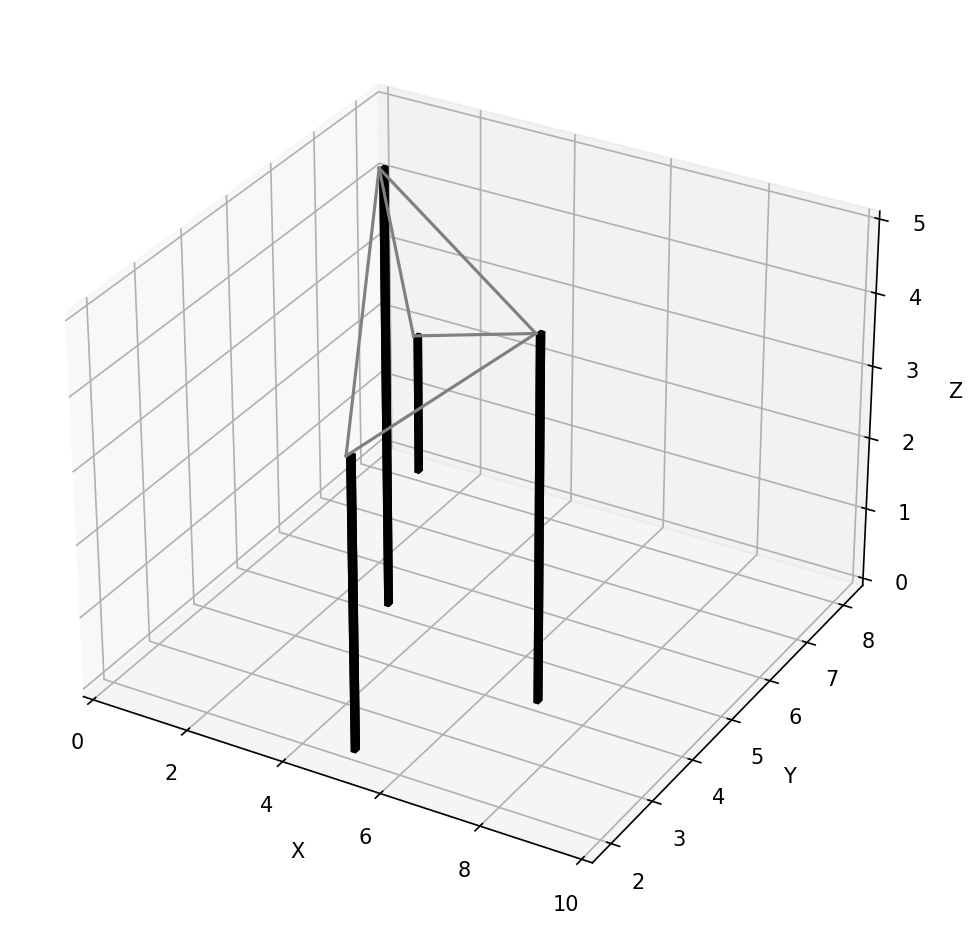

In [3]:
# 绘图设置
fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.gca(projection='3d')  # 三维坐标轴

# X和Y的个数要相同
x1=[1,8,2]
x2=[3,5,6]
x3=[5,2,4]
x4=[7,4,5]
xtotal=[x1,x2,x3,x4]

#画条形图
for i in xtotal:
    X=[i[0]]
    Y=[i[1]]
    Z=[i[2]]
    # meshgrid把X和Y变成平方长度，比如原来都是4，经过meshgrid和ravel之后，长度都变成了16，因为网格点是16个
    xx, yy = np.meshgrid(X, Y)  # 网格化坐标
    X, Y = xx.ravel(), yy.ravel()  # 矩阵扁平化
    # 设置柱子属性
    height = np.zeros_like(Z) # 新建全0数组，shape和Z相同，据说是图中底部的位置
    width = depth = 0.1 # 柱子的长和宽
    # 开始画图，注意本来的顺序是X, Y, Z, width, depth, height，但是那样会导致不能形成柱子，只有柱子顶端薄片，所以Z和height要互换
    ax.bar3d(X, Y, height, width, depth, Z,  color=['black']*len(Z), shade=False)  # width, depth, height
    
#画连接线
arr=get3DVGPoint(xtotal)
for i in arr:
    ax.plot([i[0][0],i[1][0]], [i[0][1],i[1][1]], [i[0][2],i[1][2]], c='gray',zorder=9)

#图的设置
ax.set_xlim(0, 10)  # X轴，横向向右方向
#ax.set_ylim(8, 0)  # Y轴,左向与X,Z轴互为垂直
ax.set_zlim(0, 5)  # 竖向为Z轴
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#plt.savefig('3DVG_bar.png',bbox_inches="tight",dpi=600)

plt.show()